# Furuta Pendulum

Ecuaciones del pendulo de furuta extraidas del artículo "On the Dynamics of the furuta Pendulum" https://www.hindawi.com/journals/jcse/2011/528341/

paper de Astrom y Furuta
https://ieeexplore.ieee.org/document/4776708

paper control furuta https://ieeexplore.ieee.org/document/4108038

https://ieeexplore.ieee.org/author/37276435400

Linealizando la el sistema en el punto de equilibrio superior:

$\theta_{1e}=0$

$\dot\theta_{1e}=\pi$

$\theta_{2e}=0$

$\dot\theta_{2e}=0$

usando Jacobian para linealizar, se obtiene el siguiente sistema en espacio de estado linealizado:

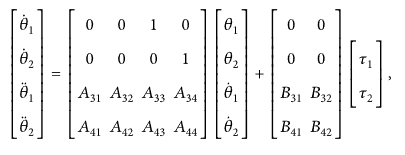


## Análisis del sistema a controlar

El sistema es un péndulo de rotación, conocido como el péndulo de furuta, el objetivo principal del diseño es mantener $\theta_2$, el ángulo del péndulo, en la posición vertical. El segundo objetivo es controlar la posición del eje del motor, es decir, el ángulo $\theta_1$. Para lograr estos objetivo la única variable de control es el torque del motor $\tau_1$ que es variable de control del sistema.

La estrategia de control adoptada para controlar este sistema es la siguiente, primero controlar el ángulo del péndulo con un regulador (referencia constante $\theta_2=0$) y luego con el primer lazo cerrado, controlar la posición del ángulo del motor para que pueda seguir referencias ($\neq 0$). 

1. A partir de la estrategia de control y del modelo con sus parámetros, obtener los polos, y ceros del sistema considerando la entrada de control torque $\tau_1$ y perturbación torque $\tau_2$, las salidas $\theta_1$ y $\theta_2$.
2. Identificar las características del primer lazo a cerrar ($\tau_1$->$\theta_2$). Identificar limitaciones de performance. ¿Qué sistema Tipo es el sistema respecto al seguimiento de referncias? Realizar un diagrama de Bode asintótico (en papel, puede usar herramientas de software para comparar, no sirve copiar) y el diagrama asintótico (idem anterior) del lugar geométrico de las raices, tanto para todo valor de $k$ (positivos y negativos). (hint: es importante entender bien el problema que se esta resolviendo).

## Resolución por usando control clásico

3. Los requerimientos mínimos para el sistema compensado son: tener una respuesta del sistema compensado tal que el tiempo de crecimiento se menor a 1 segundos ($t_r<=2s$), proponga un límite para el sobrepico que le parezca adecuado y contemplar las **limitaciones de performance** propias del sistema. En base a lo anterior traducir en especificaciones para la ubicación de polos dominantes en el plano-s y en especificaciones frecuenciales. Dibujar la zona del plano-s que cumple con lo anterior. Definir la ubicación de los polos dominantes y especificaciones frecuenciales a cumplir. Justificar su elección.
4. Diseñar un compensador con técnicas de control clásico que cumpla con lo anterior. Primero cerrar el lazo de $\tau_1$->$\theta_2$. Verificar el diseño por medio de diagramas de rlocus, bode y verificar estabilidad del sistema a lazo cerrado.
5. Comprobar la respuesta del sistema en simulacion ante perturbaciónes.
6. Diseñar el control de referencias para $\theta_1$, a partir del lazo anterior funcionando correctamente, estudiar la dinámica que se pretende controlar. Observar polos y ceros del nuevo sistema, plantear especificaciones teniendo en cuenta limitaciones de performance que pudiera tener el nuevo lazo.
7. Verificar el diseño anterior en simulación, mostrar y analizar la respuesta del sistema a lazo cerrado para una señal de referencia de $\theta_{1-ref}=6º$. Para la misma señal de referencia mostrar la respuesta del péndulo $\theta_2$. Con referencia nula, ver la respusta del sistema anter un perturbaciones como se propone (esto es equivalente a darle un golpe al pendulo)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [2]:
g=9.81       #m/s²

L1 = 0.278   #m
L2 = 0.300   #m
l1 = 0.150   #m
l2 = 0.148   #m
m1 = 0.300   #kg
m2 = 0.075   #kg
J1 = 2.48e-2 #kg*m²
J2 = 3.86e-3 #kg*m²
b1 = 1.00e-4 #Nms
b2 = 2.80e-4 #Nms
Lm = 0.005   #H
Rm = 7.8     #ohm
Km = 0.090   #Nm/A

J1_hat = J1 + m1*l1**2
J2_hat = J2 + m2*l2**2

J0_hat = J1 + m1*l1**2+ m2*L1**2

p =  J0_hat*J2_hat-m2**2*L1**2*l2**2

In [3]:
A31 = 0
A32 = g*m2**2*l2**2*L1/p
A33 = -b1*J2_hat/p
A34 = -b2*m2*l2*L1/p

A41 = 0
A42 = g*m2*l2*J0_hat/p
A43 = -b1*m2*l2*L1/p
A44 = -b2*J0_hat/p

B31 = J2_hat/p
B41 = m2*L1*l2/p
B32 = m2*L1*l2/p
B42 = J0_hat/p

#downward position
#A34 = -A34
#A42 = -A42
#A43 = -A43
#B32 = -B32
#B41 = -B41

In [4]:

A = np.matrix([[0  , 0  , 1  ,   0],
               [0  , 0  , 0  ,   1],
               [A31, A32, A33,  A34],
               [A41, A42, A43,  A44]])

B = np.matrix([[0   ,0],
               [0   ,0],
               [B31 ,B32],
               [B41 ,B42]])

B_tau1 = B[:,0]
B_tau2 = B[:,0]

C = np.eye(4)

C_theta1 = C[0,:]
C_theta2 = C[1,:]
C_theta1_2 = C[0:2,:]

D = np.zeros([4,1])




In [26]:
states = ['theta1', 'theta2', 'theta1_dot', 'theta2_dot']
inputs = ['tau1','tau2']
outputs = ['theta1', 'theta2']
furuta = ctrl.ss(A,B,C_theta1_2,0)
furuta

<LinearIOSystem:sys[35]:['u[0]', 'u[1]']->['y[0]', 'y[1]']>

(array([ 0.00000000e+00+0.j, -4.58200698e+00+0.j,  4.52852151e+00+0.j,
        -2.67764138e-03+0.j]),
 array([ 4.4230342 +0.j, -4.47391739+0.j]))

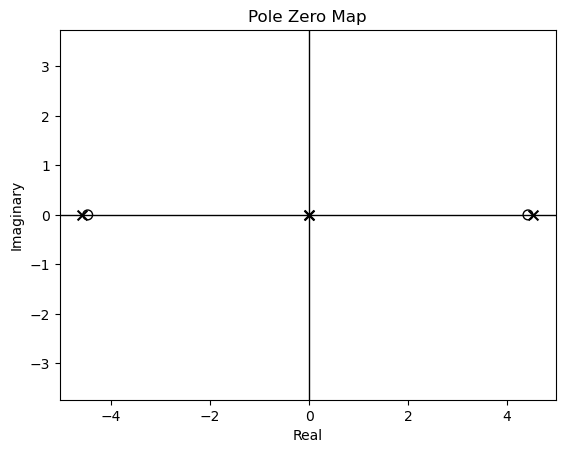

In [28]:
ctrl.pzmap(furuta[0,0])# tau1 a theta1

(array([ 0.00000000e+00+0.j, -4.58200698e+00+0.j,  4.52852151e+00+0.j,
        -2.67764138e-03+0.j]),
 array([-6.20666445e-18+0.j,  0.00000000e+00+0.j]))

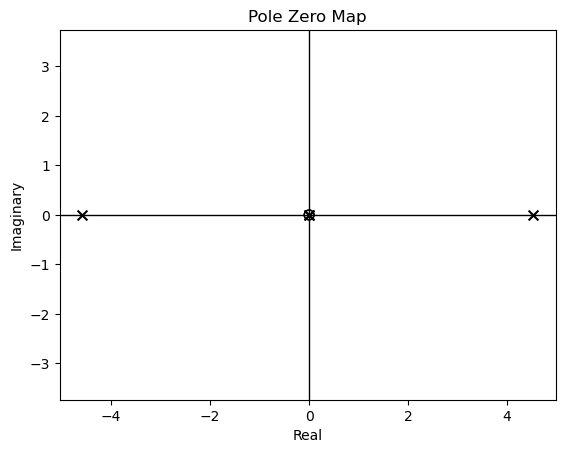

In [29]:
ctrl.pzmap(furuta[1,0])# tau1 a theta2

In [30]:
Gtau1_theta1 = ctrl.ss2tf(furuta[0,0])# tau1 a theta1
Gtau1_theta2 = ctrl.ss2tf(furuta[1,0])# tau1 a theta2

In [31]:
Gtau1_theta1

TransferFunction(array([  28.07736417,    1.42866576, -555.60301334]), array([ 1.00000000e+00,  5.61631166e-02, -2.07495740e+01, -5.55603013e-02,
        3.36574010e-14]))

In [32]:
Gtau1_theta2

TransferFunction(array([ 1.57449172e+01, -2.55210089e-11]), array([  1.        ,   0.05616312, -20.74957395,  -0.0555603 ]))

In [22]:
Gtau1_theta2.pole(),Gtau1_theta2.zero(),Gtau1_theta2.dcgain()

(array([-4.58200698e+00+0.j,  4.52852151e+00+0.j, -2.67764138e-03+0.j]),
 array([1.62090461e-12+0.j]),
 4.5933892221693843e-10)

In [23]:
Gtau1_theta1.pole(),Gtau1_theta1.zero()

(array([-4.58200698e+00+0.j,  4.52852151e+00+0.j, -2.67764138e-03+0.j,
         6.05781469e-13+0.j]),
 array([-4.47391739+0.j,  4.4230342 +0.j]))

In [24]:
Gtheta1_theta2 = ctrl.tf([1,0,0],[1,4.47391739])*ctrl.tf([1],[1,-4.4230342])*15.74/28.08
G12=ctrl.minreal(Gtau1_theta1*Gtheta1_theta2)
G12

2 states have been removed from the model


TransferFunction(array([15.73852251,  0.        ,  0.        ]), array([ 1.00000000e+00,  5.61631166e-02, -2.07495740e+01, -5.55603013e-02,
        3.36574010e-14]))

In [25]:
G12.pole(),G12.zero()

(array([-4.58200698e+00+0.j,  4.52852151e+00+0.j, -2.67764138e-03+0.j,
         6.05781469e-13+0.j]),
 array([0.+0.j, 0.+0.j]))

### Ubicación de polos del sistema

Las especificaciones en el dominio temporal para el sistema son:

In [16]:
ts=5
sigma = 4/ts

xi=.51
Mp= np.exp(-xi*np.pi/np.sqrt(1-xi**2))

wn=sigma/xi

wd=wn*np.sqrt(1-xi**2)

Mp,sigma,wn,xi,wd 

(0.1552591268514642, 0.8, 1.5686274509803921, 0.51, 1.3492931779154753)

Además, el polo en C+ hace que el sistema requiera un ancho de banda mínimo según:

In [17]:
p_inestable = 4.52
wn= 2*p_inestable
sigma=wn*xi
wd=wn*np.sqrt(1-xi**2)

wn,sigma,wd

(9.04, 4.610399999999999, 7.775976584326884)

In [18]:
p_obj= -sigma+wd*1j
p_obj

(-4.610399999999999+7.775976584326884j)

### Lazo de control de $\theta_2$ con $\tau_1$

Cerrar el lazo interno para controlar la posición del péndulo en la parte superior. Usando diseño por frecuencia.

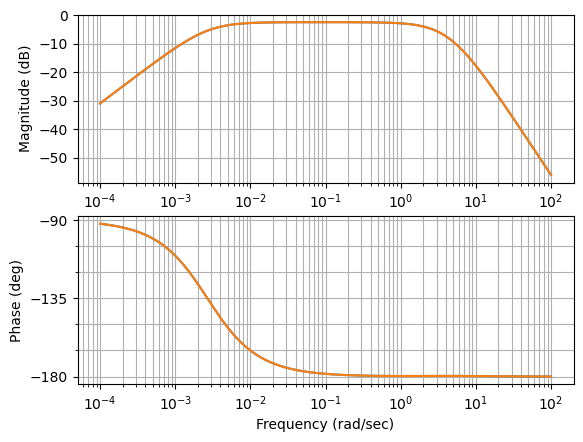

In [19]:
ctrl.bode([G12,Gtau1_theta2],dB=True);#comparando las funciones de transferencia... usando Gtau1_theta1 y Gtheta1_theta2

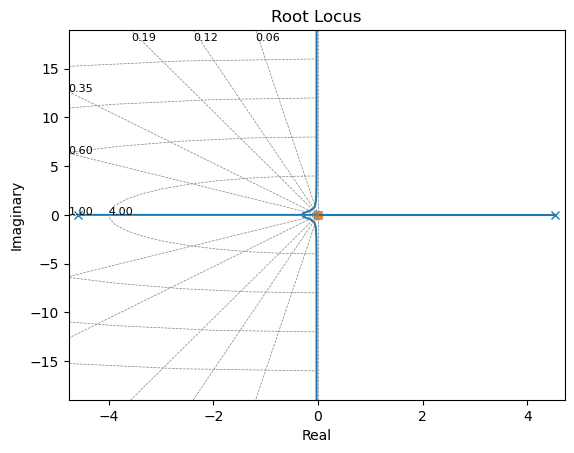

In [20]:
ctrl.rlocus(Gtau1_theta2);

Analizando el problema propongo un controlador del tipo PID= 1 integrador para eliminar el error y 2 ceros, evaluare si es necesario agregar un polo de filtro. La idea es merorar la respuesta estacionaria ya que tiene un cero en cero y luego tener un wc=10rad/s con una pendiente de -20dB/dec

In [21]:
Dtheta2 = ctrl.tf(1,[1, 0])*ctrl.tf([1/4.58, 1],1)*ctrl.tf([1/4.58, 1],1)
Dtheta2.pole(),Dtheta2.zero()

(array([0.+0.j]), array([-4.58000004+0.j, -4.57999996+0.j]))

In [22]:
k1=1/np.abs((Dtheta2*Gtau1_theta2)(10j))
k1

13.297815909362228

In [ ]:
D1=ctrl.tf(k1*Dtheta2,input='theta2',output='u1')

In [23]:
L1=k1*Dtheta2*Gtau1_theta2
L1.pole(),L1.zero()

(array([-4.58200698e+00+0.j,  4.52852151e+00+0.j, -2.67764138e-03+0.j,
         0.00000000e+00+0.j]),
 array([-4.58000009e+00+0.j, -4.57999991e+00+0.j,  1.03600853e-12+0.j]))

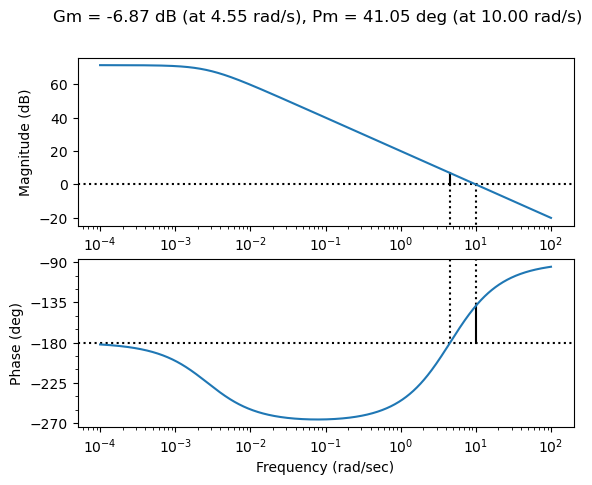

In [24]:
ctrl.bode(L1,dB=True,margins=True);

C:\Users\juanp\AppData\Local\Temp\ipykernel_11656\2594832264.py:1: UserWarning: indented contour may miss closed loop pole; consider reducing indent_radius to below 1e-12
  ctrl.nyquist(L1)
C:\Users\juanp\AppData\Local\Temp\ipykernel_11656\2594832264.py:1: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  ctrl.nyquist(L1)


-1

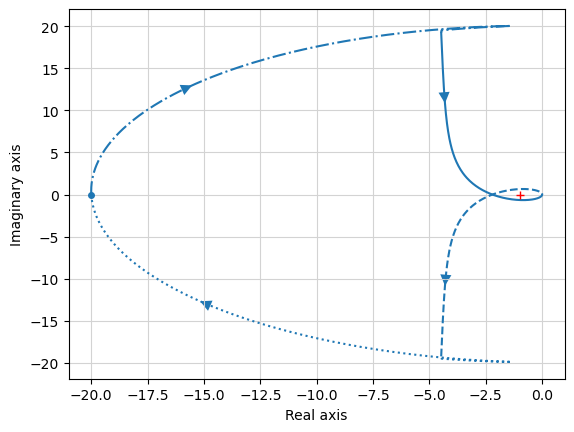

In [25]:
ctrl.nyquist(L1)

In [26]:
T1=ctrl.feedback(L1) #lazo interno con regulador entre tau1 y theta2
T1.pole()

array([-2.72775784e+00+6.18399622j, -2.72775784e+00-6.18399622j,
       -4.58200795e+00+0.j        ,  1.03628352e-12+0.j        ])

In [27]:
ctrl.bandwidth(T1)

16.374968921916338

In [28]:
t1,y1 =ctrl.impulse_response(T1)

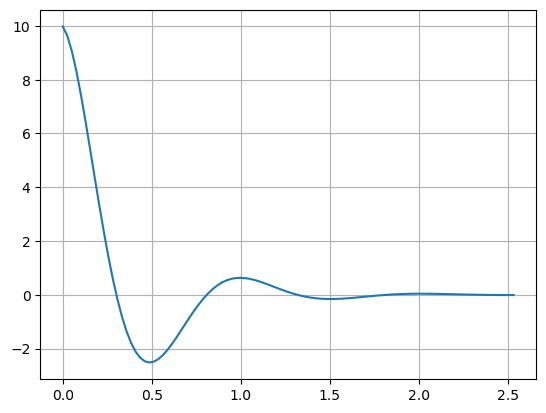

In [29]:
plt.plot(t1,y1)
plt.grid()

**Bueno... listo el regulador vamos por el control de referencia para la posición de $\theta_1$**

In [35]:
Ttau1_theta1=ctrl.minreal(ctrl.feedback(1,L1)*Gtau1_theta1)
Ttau1_theta1

3 states have been removed from the model


TransferFunction(array([  28.07736417,    1.42866576, -555.60301334,    0.        ]), array([ 1.00000000e+00,  1.00375227e+01,  7.06796830e+01,  2.09317406e+02,
       -5.02601734e-10,  2.96055378e-22]))

(array([-2.72775784e+00+6.18399622j, -2.72775784e+00-6.18399622j,
        -4.58200698e+00+0.j        ,  1.36486287e-12+0.j        ,
         1.03628352e-12+0.j        ]),
 array([-4.47391739+0.j,  4.4230342 +0.j,  0.        +0.j]))

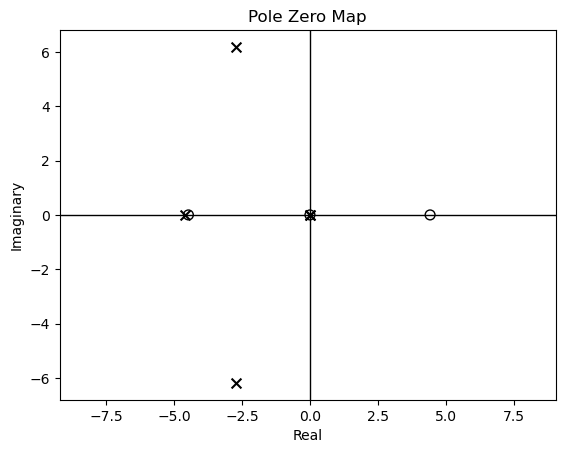

In [38]:
ctrl.pzmap(Ttau1_theta1)

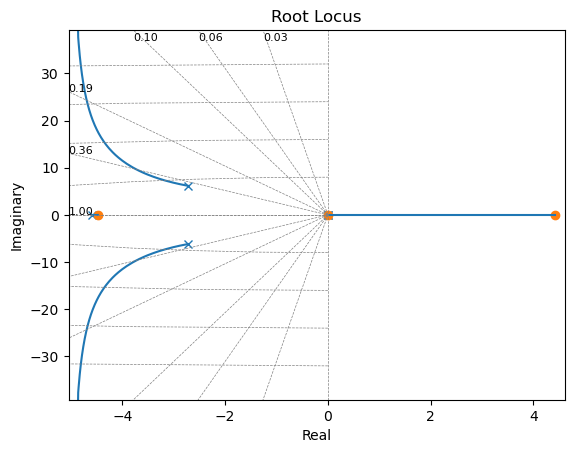

In [46]:
ctrl.rlocus(Ttau1_theta1);

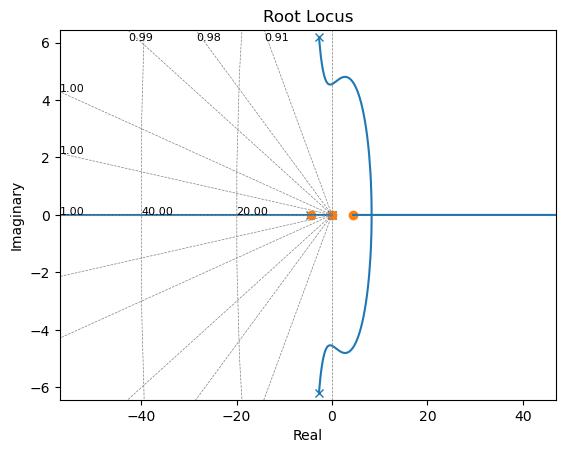

In [50]:
ctrl.rlocus(-Ttau1_theta1); #con k<0 

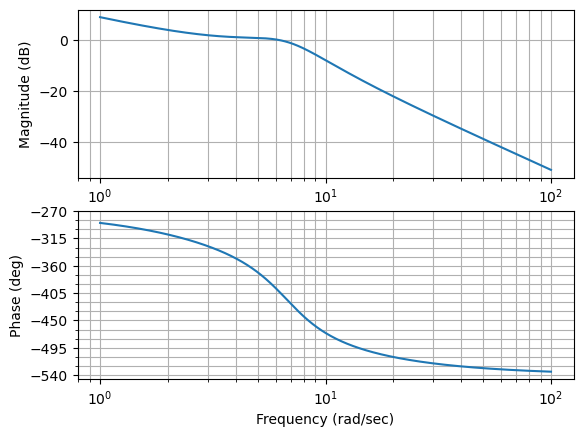

In [52]:
ctrl.bode(Ttau1_theta1,dB=True);

Del análisis anterior, mirando la ubicación de polos y ceros, el rlocus y bode podemos deducir que el sistema es de no mínima fase y tiene un cero en el semiplano derecho en 4.4230342, luego tienen 1 integrador y dos polos complejos conjugados... es inestable para cualquier ganancia de rlocus y el estacionario debería ser bueno, ya que es de tipo 1 respecto al seguimiento de referencias.

De lo anterior, voy a proponer un compensador que estabilice el sistema con una frecuencia no mayor a aprox. 2,2rad/s, voy a usar k<0 ya que es conveniente para estabilizar el sistema y podría ser necesario agregar un filtro pasa bajos en 20rad/s para mejorar el margen de estabilidad, por la baja pendiente de roll-off (pendiente luego del $w_c$ )... veamos que sale!

In [53]:
z=4.4230342
wc2=z/2 #la mitad del cero en C+

k2=1/abs(Ttau1_theta1(wc2*1j))
k2,wc2

(0.6907348195770658, 2.2115171)

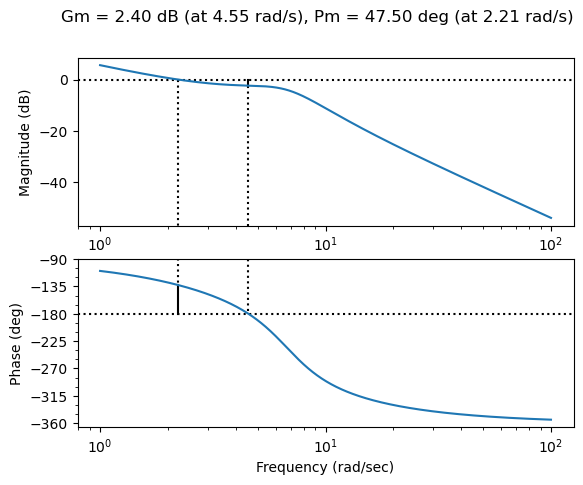

In [44]:
ctrl.bode(-Ttau1_theta1*k2,dB=True,margins=True);

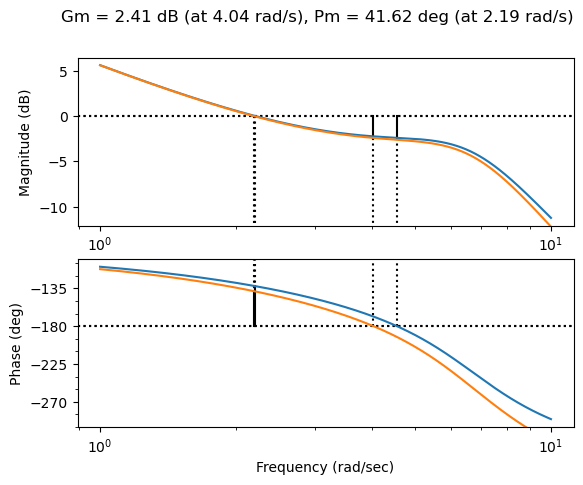

In [55]:
D2=ctrl.tf(-k2,[1/20, 1])
ctrl.bode([-k2*Ttau1_theta1,D2*Ttau1_theta1],dB=True,margins=True,omega_limits=[1,10]);

Apriori, no hay una mejora en la pendiente del roll-off y se nota una disminusión del Margen de fase esperado de 6° aprox. por lo que propongo como compensador el proporcional que obtenido antes.

In [57]:
D2=ctrl.tf(-k2,1,input='e_theta1',output='u2')

Analicemos la respuesta...

In [58]:
Ttheta1 = ctrl.feedback(D2*Ttau1_theta1) # funcion a LC de Theta1_ref a Theta1 [rad]
Ttheta1

TransferFunction(array([-19.39401307,  -0.98682919, 383.77434717,   0.        ]), array([1.00000000e+00, 1.00375227e+01, 5.12856699e+01, 2.08330577e+02,
       3.83774347e+02, 2.96055378e-22]))

In [65]:
Ttheta1.minreal()

TransferFunction(array([-19.39401307,  -0.98682919, 383.77434717]), array([  1.        ,  10.03752265,  51.28566989, 208.33057681,
       383.77434717]))

In [60]:
Ttheta1.pole(),Ttheta1.zero()

(array([-6.92688566e-01+4.54938583j, -6.92688566e-01-4.54938583j,
        -5.09577990e+00+0.j        , -3.55636562e+00+0.j        ,
        -7.71430870e-25+0.j        ]),
 array([-4.47391739+0.j,  4.4230342 +0.j,  0.        +0.j]))

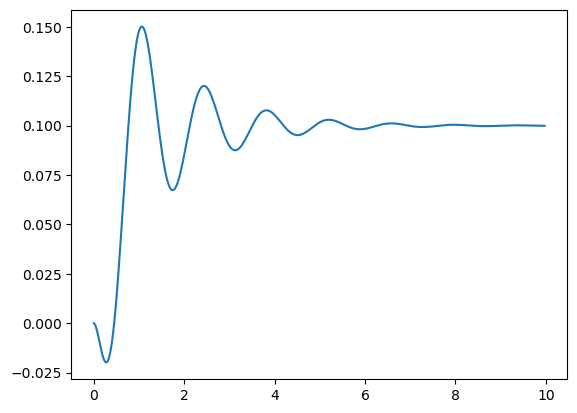

In [66]:
t2,y2=ctrl.step_response(Ttheta1.minreal()*.1)#Escalón de 0.1rad de referencia
plt.plot(t2,y2)

In [67]:
ctrl.step_info(Ttheta1.minreal()*.1)

{'RiseTime': 0.24388978745556888,
 'SettlingTime': 5.392674189295357,
 'SettlingMin': 0.06734061183252203,
 'SettlingMax': 0.15019592923833117,
 'Overshoot': 50.19592923813431,
 'Undershoot': 19.912230005124247,
 'Peak': 0.15019592923833117,
 'PeakTime': 1.0568557456407985,
 'SteadyStateValue': 0.10000000000013107}

In [74]:


Ttheta2 = (D2 *Gtau1_theta2)/((1+Gtau1_theta1*D2)*(1+D1*Gtau1_theta2)-D1*D2*Gtau1_theta2*Gtau1_theta1)# lazo cerrado de theta1_ref a theta2

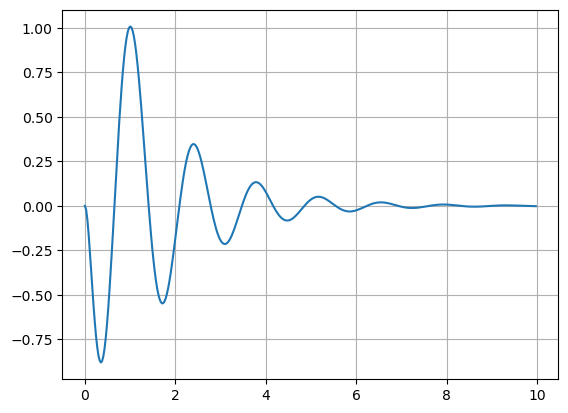

In [73]:
t3,y3=ctrl.step_response(Ttheta2.minreal()*.1)#Escalón de 0.1rad de referencia
plt.plot(t3,y3*180/np.pi)# en grados
plt.grid()

In [78]:
(D2 *Gtau1_theta2).pole()

array([-4.58200698e+00+0.j,  4.52852151e+00+0.j, -2.67764138e-03+0.j])

0

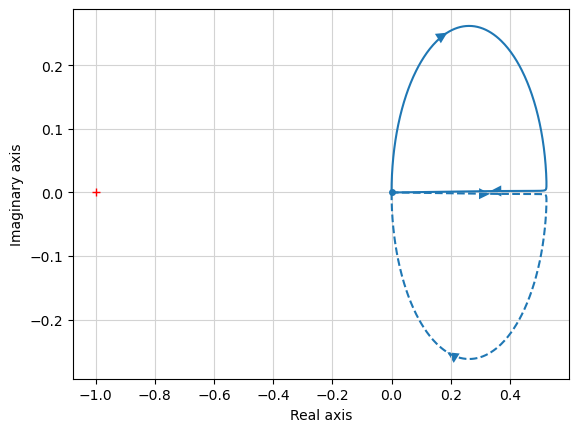

In [77]:
ctrl.nyquist(D2 *Gtau1_theta2)

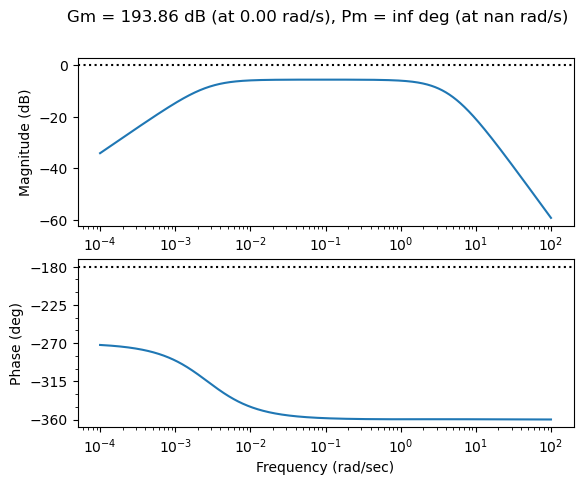

In [76]:
ctrl.bode(D2 *Gtau1_theta2,dB=True,margins=True);

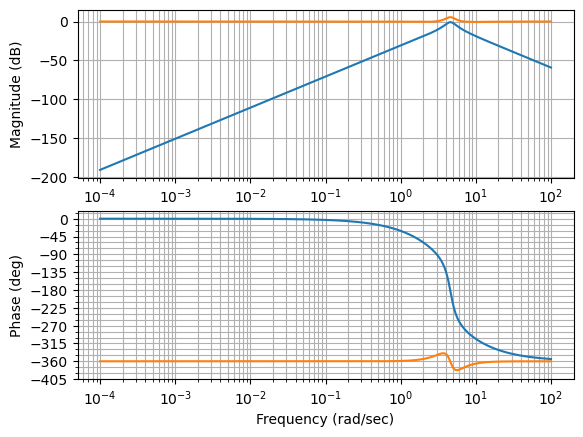

In [75]:
ctrl.bode([Ttheta2.minreal(),1-Ttheta2.minreal()],dB=True);#esto no me cierra